In [1]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

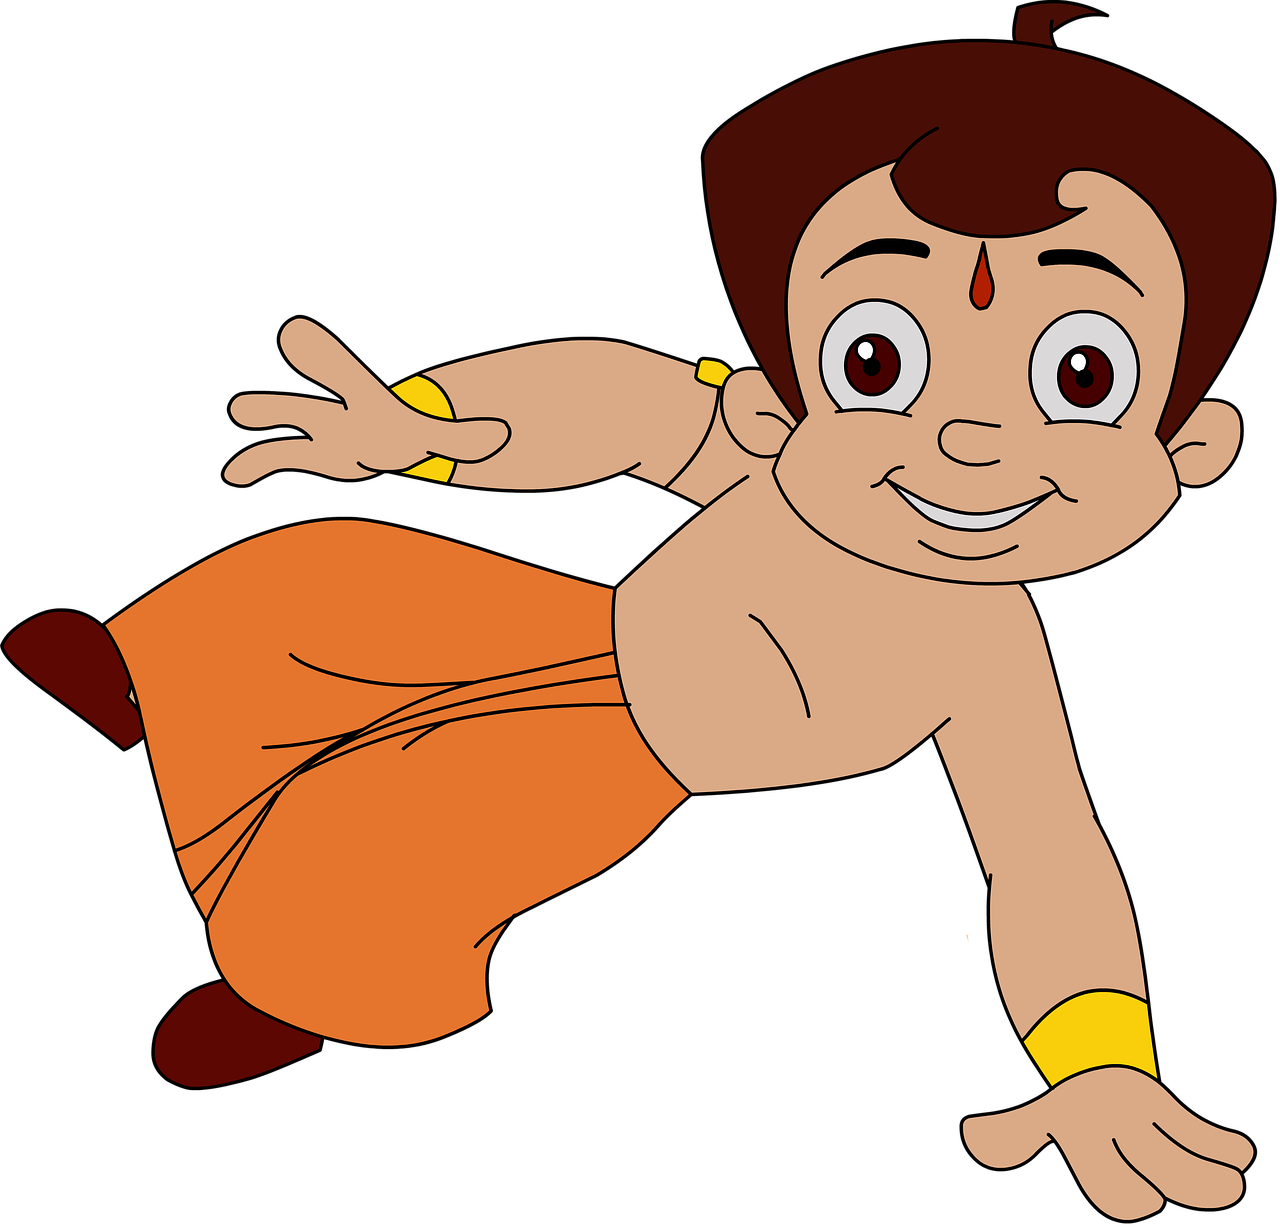

In [2]:
image = Image.open(r"C:\Users\Rakshita\Downloads\cb.webp")
image


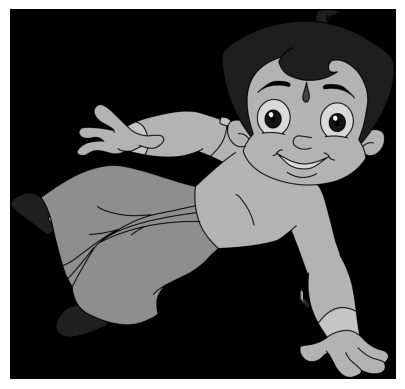

In [3]:
img = image.convert('L') 
arr = np.array(img)
plt.imshow(arr, cmap='gray')
plt.axis('off')
plt.show()

In [4]:
def convolve2d(image, kernel):
    kernel_height, kernel_width = kernel.shape
    image_height, image_width = image.shape
    pad_height = kernel_height // 2
    pad_width = kernel_width // 2

    padded_image = np.pad(image, ((pad_height, pad_height), (pad_width, pad_width)), mode='constant', constant_values=0)
    output = np.zeros_like(image)

    for i in range(image_height):
        for j in range(image_width):
            region = padded_image[i:i + kernel_height, j:j + kernel_width]
            output[i, j] = np.sum(region * kernel)

    return output

In [ ]:
# Prewitt Filter
def prewitt_filter(image):
    prewitt_x = np.array([[-1, 0, 1],
                        [-2, 0, 2],
                        [-1, 0, 1]])

    prewitt_y = np.array([[1, 2, 1],
                        [0, 0, 0],
                        [-1, -2, -1]])
    gx = convolve2d(image, prewitt_x)
    gy = convolve2d(image, prewitt_y)
    magnitude = np.sqrt(gx**2 + gy**2)
    edges = (magnitude / np.max(magnitude) > 0.4) * 255
    return edges.astype(np.uint8)

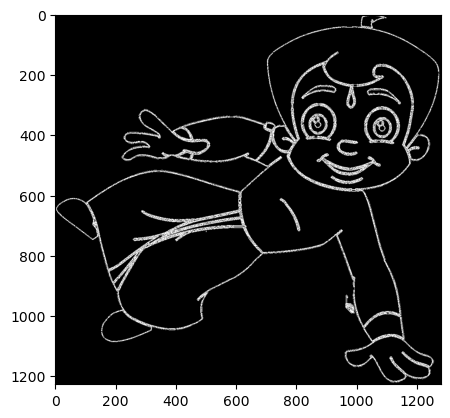

In [6]:
prewitt_img = prewitt_filter(arr)
plt.imshow(prewitt_img, cmap='gray')

In [ ]:
# Sobel Filter
def sobel_filter(image):
    sobel_x = np.array([[-1, 0, 1],
                        [-2, 0, 2],
                        [-1, 0, 1]])

    sobel_y = np.array([[1, 2, 1],
                        [0, 0, 0],
                        [-1, -2, -1]])
    gx = convolve2d(image, sobel_x)
    gy = convolve2d(image, sobel_y)
    magnitude = np.sqrt(gx**2 + gy**2)
    edges = (magnitude / np.max(magnitude)> 0.4) * 255
    return edges.astype(np.uint8)

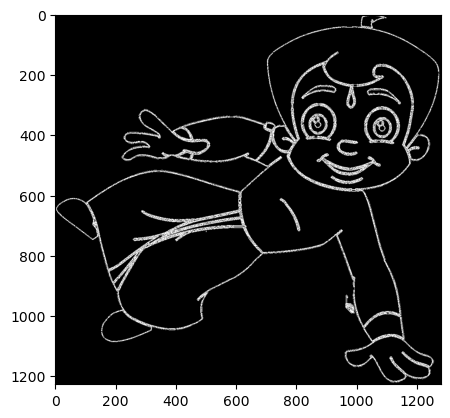

In [8]:
sobel_img = sobel_filter(arr)
plt.imshow(sobel_img, cmap='gray')

In [ ]:
# Scharr Filter
def scharr_filter(image):
    scharr_x = np.array([[3, 0, -3],
                        [10, 0, -10],
                        [3, 0, -3]])

    scharr_y = np.array([[3, 10, 3],
                        [0, 0, 0],
                        [-3, -10, -3]])
    gx = convolve2d(image, scharr_x)
    gy = convolve2d(image, scharr_y)
    magnitude = np.sqrt(gx**2 + gy**2)
    edges = (magnitude / np.max(magnitude)>0.2) * 255
    return edges.astype(np.uint8)

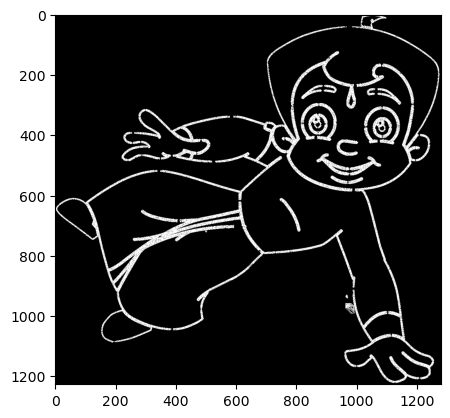

In [10]:
scharr_img = scharr_filter(arr)
plt.imshow(scharr_img, cmap='gray')

In [ ]:
# Laplacian of Gaussian Filter
def log_filter(image):
    log_kernel = np.array([[0, 0, -1, 0, 0],
                            [0, -1, -2, -1, 0],
                            [-1, -2, 16, -2, -1],
                            [0, -1, -2, -1, 0],
                            [0, 0, -1, 0, 0]])
    log_img = convolve2d(image, log_kernel)
    edges = (log_img / np.max(log_img)>0.3) * 255
    return edges.astype(np.uint8)


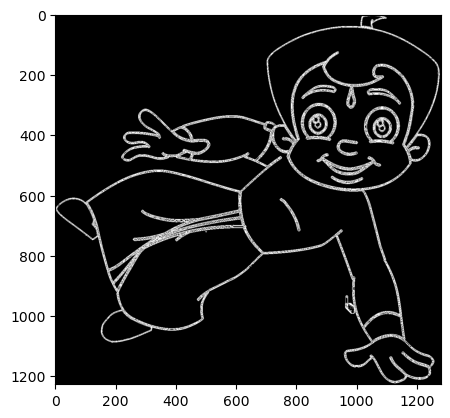

In [12]:
log_img = log_filter(arr)
plt.imshow(log_img, cmap='gray')

In [ ]:
#LOG Filter with modifiable sigma
def log_sigma_filter(image, sigma=1.0):
    kernel_size = int(2 * np.ceil(3 * sigma) + 1)
    kernel_radius = kernel_size // 2 
    x, y = np.meshgrid(np.arange(-kernel_radius, kernel_radius + 1), np.arange(-kernel_radius, kernel_radius + 1))
    log_kernel = (1 / (np.pi * sigma**4)) * (x**2 + y**2 - 2 * sigma**2) * np.exp(-(x**2 + y**2) / (2 * sigma**2))
    log_img = convolve2d(image, log_kernel)
    edges = (log_img / np.max(log_img)>0.7) * 255
    return edges.astype(np.uint8)


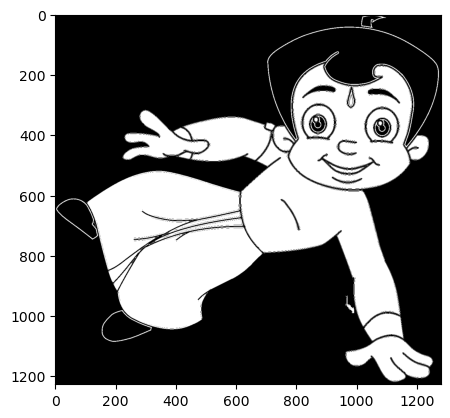

In [14]:
log_sigma_img = log_sigma_filter(arr, sigma=1.0)
plt.imshow(log_sigma_img, cmap='gray')